# 형태소 분석기 설치

In [2]:
# !git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
# %cd Mecab-ko-for-Google-Colab
# !bash install_mecab-ko_on_colab190912.sh

# 필요한 모듈 import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
# from konlpy.tag import Mecab
from konlpy.tag import Komoran

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 다운로드 및 불러오기

In [4]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7fea6133f310>)

In [5]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 200000


In [6]:
total_data

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


# 데이터 전처리

## 라벨 추가

In [7]:
# ratings 컬럼의 값별 개수를 계산하세요
total_data['ratings'].value_counts()

5    81177
2    63989
1    36048
4    18786
Name: ratings, dtype: int64

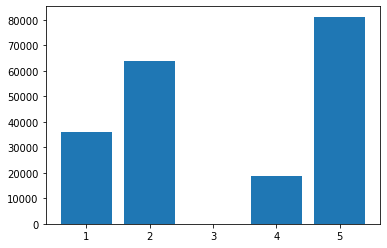

In [8]:
# ratings 컬럼의 값별 개수를 시각화하세요.
plt.bar(total_data['ratings'].unique(), total_data['ratings'].value_counts())
plt.show()

In [9]:
# ratings 컬럼의 값이 1,2인 경우 0을, 4,5인 경우 1을 가지는 label 컬럼을 만드세요.
total_data['label'] = np.where((total_data['ratings'] == 1) | (total_data['ratings'] == 2), 0, 1)
total_data

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...,...
199995,2,장마라그런가!!! 달지않아요,0
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,1
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,1
199998,5,넘이쁘고 쎄련되보이네요~,1


In [10]:
# label	컬럼의 값별 개수를 계산하세요
total_data['label'].value_counts()

0    100037
1     99963
Name: label, dtype: int64

## 리뷰 중복 제거

In [11]:
# reviews 컬럼의 고유값별 개수를 확인하세요.
len(set(total_data['reviews']))

199908

In [12]:
# 코드를 실행하세요.
# drop_duplicates 함수를 이용하여 중복된 데이터를 제거하세요.
# subset=['reviews'] 적용
total_data = total_data.drop_duplicates(subset=['reviews'])
total_data

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...,...
199995,2,장마라그런가!!! 달지않아요,0
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,1
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,1
199998,5,넘이쁘고 쎄련되보이네요~,1


In [13]:
# 결측치를 조회하세요.
total_data.isna().sum()

ratings    0
reviews    0
label      0
dtype: int64

## 학습, 평가 데이터 분리

In [14]:
# 데이터를 학습용과 평가용으로 분할하세요. (75:25, random_state = 0)
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(total_data, random_state =0)

In [15]:
# 학습용 데이터의 개수를 조회하세요.
len(train_data)

149931

In [16]:
# 평가용 데이터의 개수를 조회하세요.
len(test_data)

49977

In [17]:
# 학습용 데이터의 상위 5개를 조회하세요.
train_data.head(5)

,ratings,reviews,label
68717,2,생각보다 풍덩?하네요 생각보다는 얇은데 저렴이니깐요.. 핏이 예쁠지는 모르겠지만 색...,0
60174,5,아직안입어봐써용,1
193872,1,재구매 조립 필요합니다 미리알려주세요,0
96575,2,잘 사용하고 있어요,0
132795,5,넘 좋은 듯 적극 추천합니다. 가성비도 좋고 정말 싸고 좋네여. 그리고 앞으로 여기...,1


## 리뷰 데이터 정리

In [18]:
# 코드를 실행하세요.
# 리뷰를 한글과 공백을 제외한 모든 문자를 제거하세요. (정규표현식 활용)
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,ratings,reviews,label
68717,2,생각보다 풍덩하네요 생각보다는 얇은데 저렴이니깐요 핏이 예쁠지는 모르겠지만 색은 나...,0
60174,5,아직안입어봐써용,1
193872,1,재구매 조립 필요합니다 미리알려주세요,0
96575,2,잘 사용하고 있어요,0
132795,5,넘 좋은 듯 적극 추천합니다 가성비도 좋고 정말 싸고 좋네여 그리고 앞으로 여기서 ...,1


## 형태소 분석 및 불용어 제거

In [19]:
# 코드를 실행하세요.
# 토큰화를 위해 형태소 분석기를 사용합니다.
komoran = Komoran()

# 형태소 분석기 사용법
data0 = train_data.loc[0, 'reviews'] # 첫번째 데이터
print('원문 :', data0)
print('형태소 분석 :',komoran.morphs(data0))

원문 : 배공빠르고 굿
형태소 분석 : ['배', '공', '빠르', '고', '굿']


In [20]:
# 각 리뷰에 형태소 분석을 하세요.
train_data['tokenized'] = train_data.loc[:,'reviews'].apply(komoran.morphs)
train_data.head()

,ratings,reviews,label,tokenized
68717,2,생각보다 풍덩하네요 생각보다는 얇은데 저렴이니깐요 핏이 예쁠지는 모르겠지만 색은 나...,0,"[생각, 보다, 풍덩하네요, 생각, 보다, 는, 얇, 은데, 저렴, 이, 니깐, 요..."
60174,5,아직안입어봐써용,1,"[아직, 안, 입, 어, 보, 아, 쓰, 어, 용]"
193872,1,재구매 조립 필요합니다 미리알려주세요,0,"[재, 구매, 조립, 필요, 하, ㅂ니다, 미리, 알리, 어, 주, 시, 어요]"
96575,2,잘 사용하고 있어요,0,"[잘, 사용, 하, 고, 있, 어요]"
132795,5,넘 좋은 듯 적극 추천합니다 가성비도 좋고 정말 싸고 좋네여 그리고 앞으로 여기서 ...,1,"[넘, 좋, 은, 듯, 적극, 추천, 하, ㅂ니다, 가성, 비도, 좋, 고, 정말,..."


In [21]:
# 코드를 실행하세요.
# 불용어를 정의합니다. (불용어를 더 추가해도 됩니다.)
stopwords = ['도', '는', '다', '의', '가', '이',
             '은', '한', '에', '하', '고', '을',
             '를', '인', '듯', '과', '와', '네',
             '들', '듯', '지', '임', '게']

In [22]:
# 코드를 실행하세요.
# 불용어를 제거하여 불필요한 토큰을 제거합니다.
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
train_data.head()

,ratings,reviews,label,tokenized
68717,2,생각보다 풍덩하네요 생각보다는 얇은데 저렴이니깐요 핏이 예쁠지는 모르겠지만 색은 나...,0,"[생각, 보다, 풍덩하네요, 생각, 보다, 얇, 은데, 저렴, 니깐, 요, 핏이, ..."
60174,5,아직안입어봐써용,1,"[아직, 안, 입, 어, 보, 아, 쓰, 어, 용]"
193872,1,재구매 조립 필요합니다 미리알려주세요,0,"[재, 구매, 조립, 필요, ㅂ니다, 미리, 알리, 어, 주, 시, 어요]"
96575,2,잘 사용하고 있어요,0,"[잘, 사용, 있, 어요]"
132795,5,넘 좋은 듯 적극 추천합니다 가성비도 좋고 정말 싸고 좋네여 그리고 앞으로 여기서 ...,1,"[넘, 좋, 적극, 추천, ㅂ니다, 가성, 비도, 좋, 정말, 싸, 좋, 어, 그리..."


In [23]:
# 테스트 데이터도 동일하게 적용합니다. (형태소 분석, 불용어 제거)
test_data['tokenized'] = test_data.loc[:,'reviews'].apply(komoran.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data.head()

,ratings,reviews,label,tokenized
30568,5,예상했던 크기여서 좋네요 조립도 다되서 오는거여서 더 만족합니다,1,"[예상, 았, 던, 크기, 어서, 좋, 네요, 조립, 되, 서, 오, 거, 어서, ..."
154189,2,맛잇긴한데 간이 약한느낌을 받았어요,0,"[맛, 잇, 기, ㄴ, ㄴ데, 간, 약하, ㄴ, 느낌, 받, 았, 어요]"
55488,2,이전 사용하던던 가루도 안생기고 좋았는데 이번 제품은 조금 사용 하다보면 가루가 많...,0,"[이전, 사용, 던, 던, 가루, 안, 생기, 좋, 았, 는데, 이번, 제품, 조금..."
28877,5,싼이유를 알 수 있을듯 ㅋ 여름에 들고다니기 좋아요,1,"[싸, ㄴ, 이유, 알, ㄹ, 수, 있, ㅋ, 여름, 다니, 기, 좋, 아요]"
35212,2,솔직히별로 솔직히 완전별로네요 ㅋㅋ 같이오는 스펀지는 왜안주는거죠 불륨키랑전원키계속...,0,"[솔직히, 별로, 솔직히, 완전, 별로, 요, ㅋㅋ, 같이, 오, 스펀지, 왜, 안..."


## 긍정, 부정 리뷰의 단어 빈도수

In [24]:
## 긍정 리뷰의 단어 빈도수 확인하기
# 긍정 리뷰의 모든 단어를 positive_words에 1차원 배열로 저장하세요. (그대로 실행)
positive_words = np.hstack(train_data.loc[train_data['label'] == 1, 'tokenized'].values)

# positive_words를 시리즈로 변환 후 단어 별 빈도수를 구하세요. (상위 10개)
pd.Series(positive_words).value_counts().head(10)

좋      34397
어요     27732
아요     24670
았      23674
ㄴ      19285
네요     18176
잘      17448
ㅂ니다    17375
어      16194
구매     16010
dtype: int64

In [25]:
## 부정 리뷰의 단어 빈도수 확인하기
# 부정 리뷰의 모든 단어를 negative_words에 1차원 배열로 저장하세요. (그대로 실행)
negative_words = np.hstack(train_data.loc[train_data['label'] == 0, 'tokenized'].values)

# negative_words를 시리즈로 변환 후 단어 별 빈도수를 구하세요. (상위 10개)
pd.Series(negative_words).value_counts().head(10)

았      28904
ㄴ      28532
네요     27539
어요     23602
어      22734
는데     20870
었      17452
안      16468
아서     14826
ㅂ니다    13246
dtype: int64

## 데이터 분리

In [26]:
# train_data의 tokenized 컬럼의 값을 x_train에 저장하세요.
x_train = train_data['tokenized']

# train_data의 label 컬럼의 값을 y_train에 저장하세요.
y_train = train_data['label']

# x_train과 y_train 변수를 numpy array로 변환하세요.
x_train = np.array(x_train)
y_train = np.array(y_train)

In [27]:
# test_data의 tokenized 컬럼의 값을 x_test에 저장하세요.
x_test = test_data['tokenized']

# test_data의 label 컬럼의 값을 y_test에 저장하세요.
y_test = test_data['label']

# x_train과 y_train 변수를 numpy array로 변환하세요.
x_test = np.array(x_test)
y_test = np.array(y_test)

## 토큰화

In [28]:
# Tokenizer를 생성하고 fit_on_text 함수를 사용하여 x_train을 피팅하세요.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [29]:
# 각 단어에 부여된 숫자를 확인하세요. (word_index)
tokenizer.word_index

{'았': 1,
 '어요': 2,
 'ㄴ': 3,
 '네요': 4,
 '좋': 5,
 '어': 6,
 '아요': 7,
 '는데': 8,
 'ㅂ니다': 9,
 '었': 10,
 '아서': 11,
 '아': 12,
 '잘': 13,
 '있': 14,
 '구매': 15,
 'ㄹ': 16,
 '배': 17,
 '너무': 18,
 '습니다': 19,
 '쓰': 20,
 '어서': 21,
 '안': 22,
 '되': 23,
 '요': 24,
 '같': 25,
 '시': 26,
 '보': 27,
 '기': 28,
 '먹': 29,
 '것': 30,
 '재': 31,
 '거': 32,
 '송': 33,
 '오': 34,
 '않': 35,
 '사': 36,
 '없': 37,
 '주': 38,
 'ㅁ': 39,
 '빠르': 40,
 '사용': 41,
 '로': 42,
 '나': 43,
 '보다': 44,
 '으로': 45,
 '겠': 46,
 '그냥': 47,
 '제품': 48,
 '지만': 49,
 '가격': 50,
 '좀': 51,
 '생각': 52,
 '면': 53,
 '만족': 54,
 '만': 55,
 '주문': 56,
 '라': 57,
 '더': 58,
 '받': 59,
 '맛': 60,
 '개': 61,
 '많이': 62,
 '때': 63,
 '니': 64,
 'ㄴ데': 65,
 '아니': 66,
 '에서': 67,
 '음': 68,
 '사이즈': 69,
 '작': 70,
 '크': 71,
 '별로': 72,
 '용': 73,
 '두': 74,
 '수': 75,
 '맛있': 76,
 '포장': 77,
 '입': 78,
 '번': 79,
 '서': 80,
 '송도': 81,
 '맞': 82,
 '던': 83,
 '편하': 84,
 '다른': 85,
 '저렴': 86,
 '상품': 87,
 '싸': 88,
 '괜찮': 89,
 '정말': 90,
 '시키': 91,
 '건': 92,
 '넘': 93,
 '알': 94,
 '보내': 95,
 '살': 96,
 '냄새': 9

In [30]:
# 단어의 수를 구하세요.
len(tokenizer.word_index)

47944

In [31]:
# 각 단어의 빈도수를 확인하세요. (word_counts)
tokenizer.word_counts

OrderedDict([('생각', 8369),
             ('보다', 10203),
             ('풍덩하네요', 1),
             ('얇', 2146),
             ('은데', 2987),
             ('저렴', 4489),
             ('니깐', 247),
             ('요', 19008),
             ('핏이', 99),
             ('예쁘', 3114),
             ('ㄹ지', 442),
             ('모르', 3296),
             ('겠', 9281),
             ('지만', 8653),
             ('색', 1921),
             ('나쁘', 619),
             ('않', 11756),
             ('귀찮', 2038),
             ('아서', 25444),
             ('그냥', 8918),
             ('입', 4976),
             ('랍니다', 74),
             ('아직', 3077),
             ('안', 20054),
             ('어', 38928),
             ('보', 15057),
             ('아', 25334),
             ('쓰', 20821),
             ('용', 5318),
             ('재', 13540),
             ('구매', 24484),
             ('조립', 1612),
             ('필요', 1318),
             ('ㅂ니다', 30621),
             ('미리', 437),
             ('알리', 185),
             ('주', 11064),
         

In [32]:
# num_words 는 10000, oov_token 은 'OOV'로 설정하여 Tokenizer를 재생성하세요.
vocab_size = 10000
oov = 'OOV'
tokenizer = Tokenizer(num_words=10000, oov_token='OOV')

In [33]:
# fit_on_text 함수를 사용하여 x_train을 피팅하세요.
tokenizer.fit_on_texts(x_train)

In [34]:
# texts_to_sequences 함수를 사용하여 x_train과 x_test를 각각 변환하세요.
# texts_to_sequences를 이용하여 text 문장을 숫자로 이루어진 리스트로 만든다. 
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
print(x_train[0])
print(x_train[1])
print(x_train[2])

[53, 45, 1, 53, 45, 178, 125, 87, 1008, 25, 1900, 118, 649, 111, 47, 50, 201, 502, 36, 185, 12, 48, 79, 2283]
[120, 23, 79, 7, 28, 13, 21, 7, 74]
[32, 16, 235, 278, 10, 654, 1230, 7, 39, 27, 3]


In [35]:
# x_train 리뷰의 최대 길이와 평균 길이를 구하세요.
# print(f'리뷰의 최대 길이 : '.format(max(x_train))

print('리뷰의 최대 길이 : ',max(len(l) for l in x_train) )
print('리뷰의 평균 길이 : ', (sum(len(l) for l in x_train)) /len(x_train))

리뷰의 최대 길이 :  74
리뷰의 평균 길이 :  16.27371924418566


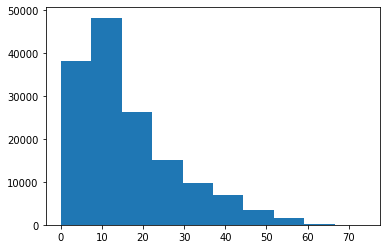

In [37]:
# x_train 리뷰의 길이 분포를 시각화하세요.

plt.hist([len(review) for review in x_train])
plt.show()

In [38]:
# 각 리뷰의 최대 길이를 80으로 하고 빈 부분은 0으로 채우세요.

import tensorflow as tf
max_len = 80
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len, padding='pre')
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len, padding='pre')


x_train[:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   53,   45,    1,   53,   45,  178,  125,   87, 1008,   25,
        1900,  118,  649,  111,   47,   50,  201,  502,   36,  185,   12,
          48,   79, 2283],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           

# 모델링

In [39]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## 모델 생성 및 학습

In [47]:
# RNN(LSTM, GRU) Layer를 이용하여 모델을 생성하세요.
model = Sequential()
embd = Embedding(vocab_size ,100, input_length=max_len)
model.add(embd)
model.add(GRU(units=128))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 80, 100)           1000000   
                                                                 
 gru_1 (GRU)                 (None, 128)               88320     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,088,449
Trainable params: 1,088,449
Non-trainable params: 0
_________________________________________________________________


In [48]:
# 코드를 실행하세요.
# 콜백
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [49]:
# 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [57]:
# 학습

hist = model.fit(x_train, y_train, epochs=15, verbose=0 , callbacks=[es,mc], batch_size=64, validation_split=0.2)



Epoch 1: val_acc improved from 0.90773 to 0.90833, saving model to best_model.h5

Epoch 2: val_acc improved from 0.90833 to 0.90883, saving model to best_model.h5

Epoch 3: val_acc did not improve from 0.90883

Epoch 4: val_acc did not improve from 0.90883

Epoch 5: val_acc did not improve from 0.90883
Epoch 5: early stopping


## 모델 평가

In [58]:
# best_model.h5 모델을 로드하고 evaluate 함수를 사용하여 테스트 테이터를 평가하세요.
loaded_model = load_model('best_model.h5')


In [59]:
# 코드를 실행하세요.
# 한 문장을 입력받아 긍정인지 부정인지 판별하는 함수를 작성하세요.
def sentiment_predict(new_sentence):
    new_sentence = komoran.morphs(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [60]:
# sentiment_predict 함수를 사용하여 다음 문장의 긍정, 부정을 판별하세요.
# "이 상품 진짜 좋아요... 저는 강추합니다. 대박"

sentiment_predict('이 상품 진짜 좋아요... 저는 강추합니다. 대박')

98.20% 확률로 긍정 리뷰입니다.
